# Lab 1. PyTorch and ANNs

**Deadline**: Mon. Jan 31 at 5:00 PM

**Total**: 30 Points

**Late Penalty**: Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TA**: Amr Mohamed <amr.mohamed@mail.utoronto.ca>

This lab is based on assignments developed by Jonathan Rose, Harris Chan, Lisa Zhang, and Sinisa Colic.

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

**Adjust the scaling to ensure that the text is not cutoff at the margins.**
## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1zxlXYznwJh25RR1V64gWQMN3PJ3DmuCb#scrollTo=mQJm7FcTXWCS

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [3]:
"""
Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
Precondition: n > 0, type(n) == int
>>> sum_of_cubes(3)
36
>>> sum_of_cubes(1)
1
"""

def sum_of_cubes(n):
    if n < 0 or type(n) is not int:
        print("Invalid input")
        return -1
    sum = 0
    for i in range(0, n+1):
        sum += i**3
    return sum

# Test case:
sum_of_cubes(-1)
sum_of_cubes(3)


Invalid input


36

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [4]:
# help(str.split)


In [5]:
# Description: takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list
# >>> word_lengths("welcome to APS360!")
# [7, 2, 7]
# >>> word_lengths("machine learning is so cool")
# [7, 8, 2, 2, 4]

def word_lengths(sentence):
    words = sentence.split(sep=' ', maxsplit=-1)  # delimiter is ' ' and maxsplit is unlimited
    word_len_list = []

    for i in range(len(words)):
        word_len_list.append(len(words[i]))

    return word_len_list


print(word_lengths("welcome to APS360!"))
print(word_lengths("machine learning is so cool"))


[7, 2, 7]
[7, 8, 2, 2, 4]


### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [6]:
# Return True if every word in sentence has the same
# length, and False otherwise.
# 
# >>> all_same_length("all same length")
# False
# >>> all_same_length("hello world")
# True

def all_same_length(sentence):
    words = sentence.split(sep=' ', maxsplit=-1)
    firstWordLen = len(words[0])

    for i in range(1, len(words)):
        if len(words[i]) != firstWordLen:
            return False

    return True

print(all_same_length("all same length"))
print(all_same_length("hello world"))

False
True


## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [7]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [8]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [9]:
matrix.size
# matrix.size represents the number of floats in the two dimensional array = 3 * 4 = 12

12

In [10]:
matrix.shape
# return the dimension

(3, 4)

In [11]:
vector.size
# vector.size represents the number of floats in the vector

4

In [12]:
vector.shape
# return the dimension

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [13]:
output = None
(m, n) = matrix.shape
(k,) = vector.shape
if(k != n):
    print("Dimension incorrect, can't perform matrix-vector multiplication")

newVec = []

for i in range(m):
    tmp = 0
    for j in range(n):
        tmp += matrix[i, j] * vector[j]
    newVec.append(tmp)
output = newVec


In [14]:
output

[4.0, 8.0, -3.0]

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [15]:
output2 = None
newVec2 = np.dot(matrix, vector)
output2 = newVec2

In [16]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [17]:
output == output2

array([ True,  True,  True])

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [18]:
import time

# record the time before running code
start_time = time.time()

# place code to run here
for i in range(m):
    tmp = 0
    for j in range(n):
        tmp += matrix[i, j] * vector[j]
    newVec.append(tmp)
    
# record the time after the code is run
end_time = time.time()

# compute the difference
diff1 = end_time - start_time
print("time for python", diff1)

start_time2 = time.time()

# place code to run here
newVec2 = np.dot(matrix, vector)
    
# record the time after the code is run
end_time2 = time.time()

# compute the difference
diff2 = end_time2 - start_time2
print("time for python", diff2)


time for python 0.00010180473327636719
time for python 6.508827209472656e-05


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [19]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [20]:
img = None
img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")

/var/folders/tn/gxktm79j0klgcyy6t4_rb0lc0000gn/T/ipykernel_2819/2936844930.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")


### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

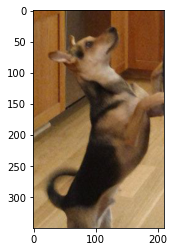

In [21]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


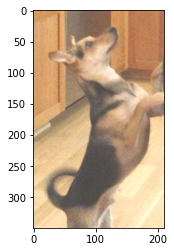

In [22]:
img_add = None
img2 = np.clip(img, 0, 1)
img_add = 0.25 + img2
plt.imshow(img_add)


### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

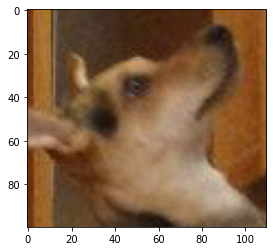

In [23]:
image_shape = img.shape  # (350, 210, 4)
img_cropped = img[20:120, 40:150, 0:3]  # Defines the dimension 
plt.imshow(img_cropped)


## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [24]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [25]:
img_torch = None
img_torch = torch.from_numpy(img_cropped)
img_torch


tensor([[[0.4157, 0.1725, 0.1216],
         [0.4118, 0.1725, 0.0510],
         [0.4745, 0.2392, 0.0275],
         ...,
         [0.5882, 0.3490, 0.1647],
         [0.6157, 0.3765, 0.1922],
         [0.6157, 0.3882, 0.2000]],

        [[0.4275, 0.1843, 0.1333],
         [0.4235, 0.1843, 0.0627],
         [0.4863, 0.2510, 0.0392],
         ...,
         [0.5843, 0.3451, 0.1608],
         [0.6118, 0.3725, 0.1882],
         [0.6157, 0.3882, 0.2000]],

        [[0.4314, 0.1882, 0.1373],
         [0.4353, 0.1961, 0.0745],
         [0.4980, 0.2627, 0.0510],
         ...,
         [0.5804, 0.3451, 0.1490],
         [0.6039, 0.3686, 0.1725],
         [0.6118, 0.3843, 0.1882]],

        ...,

        [[0.4510, 0.2392, 0.1059],
         [0.4157, 0.1961, 0.0510],
         [0.4549, 0.2275, 0.0706],
         ...,
         [0.5020, 0.4078, 0.3059],
         [0.4314, 0.3294, 0.2314],
         [0.4314, 0.3216, 0.2275]],

        [[0.4549, 0.2431, 0.1098],
         [0.4118, 0.1922, 0.0471],
         [0.

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [26]:
img_torch.shape

torch.Size([100, 110, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [27]:
num_fp = img_torch.shape[0] * img_torch.shape[1] * img_torch.shape[2]
print("There are %d floating point elements" % num_fp)

There are 33000 floating point elements


### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [28]:
img_torch.transpose(0, 2)
img_torch.shape
img_torch.transpose(0, 2).shape
# img_torch.transpose(0,2) change the shape from [100, 110, 3] to [100, 110, 3]


torch.Size([3, 110, 100])

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [29]:
img_unsqueeze = img_torch.unsqueeze(0)
print(img_unsqueeze.shape) 

# The unsqueeze function insert a dimension of size 1 in the 0 position, and returns a new matrix with shape [1,130,150,3] 
# The original variable img_torch is not updated


torch.Size([1, 100, 110, 3])


### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [30]:
# There are 3 dimensions, length, width, and color
max_1st_dim = torch.max(img_torch, 0) # max over length 
max_tensor = torch.max(max_1st_dim[0], 0) # max over length and width
max_tensor.values

tensor([0.8941, 0.7882, 0.6745])

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate



In [31]:
import torch
import torch.nn as nn #* class nn.Linear defines a fully-connected layer
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt  # for plotting
import torch.optim as optim

torch.manual_seed(1)  # set the random seed
#* important for reproducing results

# define a 2-layer artificial neural network

## ANN Architecture: define a 2-layer neural network


class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__() 
        self.layer1 = nn.Linear(28 * 28, 30)  # $ number of hidden unit 
        
        # $ number of layers added here
        self.layer2 = nn.Linear(30, 1)

    def forward(self, img): #* forward() method defines how to make a prediction
        flattened = img.view(-1, 28 * 28)  # -1 here means auto inference
        activation1 = self.layer1(flattened)
        # $ types of activation functions: relu, leak_relu, prelu, sigmoid
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2
    #* modern framework for deep learning automatically implement back propagation


pigeon = Pigeon()


## PyTorch: Load Data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


## Forward and Backward Pass
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)  # * learning rate

# for i in range(num_of_iterations): #$ number of training iterations
for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1, 1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image))  # step 1-2 #* make prediction
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)  #* obtain gradients
    optimizer.step()                   # step 4 (make the updates for each parameter) #* updates parameters
    optimizer.zero_grad()  # * a clean up step for PyTorch


## PyTorch: Training and Validation Error
# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):  # * we set the threshold to 0.5, but it can be others values
        error += 1
print("Training Error Rate:", error / len(mnist_train))
print("Training Accuracy:", 1 - error / len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error / len(mnist_val))
print("Test Accuracy:", 1 - error / len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for i in range (6):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.001
Training Accuracy: 0.999
Test Error Rate: 0.063
Test Accuracy: 0.937


In [33]:
# When number of training iterations is increasing (when greater than 6, it's 0.999), accuracy on training data is improving. However, this is overfitting.
# When the number of hidden units increases, the accuracy of training data is also improving, but it is less obvious than the change in iteration times


### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for i in range (20):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.001
Training Accuracy: 0.999
Test Error Rate: 0.058
Test Accuracy: 0.942


In [35]:
# When number of training iterations is increasing (when greater than 6, it's 0.999), accuracy on training data is improving. 
# When number of iteration is 20, the accuracy is at its best at 0.942.
# When the number of hidden units increases, the accuracy of training data is also improving, but it is less obvious than the change in iteration times

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

In [36]:
# From (b)
# Because accuracy of testing data (unknown) is more important. If we simply add too much iterations, that would cause overfitting.